## Train x-modalix example

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [2]:
import os
from autoencodix.configs.default_config import DataConfig, DataInfo, DefaultConfig
import autoencodix as acx


IMGROOT = os.path.join("../data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("../data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("../data/AM3_NO2_raw_cell.tsv")

img_config = DefaultConfig(
    checkpoint_interval=25,
	loss_reduction = "sum",
    class_param="early",
    epochs=250,
    pretrain_epochs=0,
	beta = 0.001,
	gamma= 1.5,
    # gamma= 0,
	delta_class= 0,
	delta_pair = 1,
	learning_rate=0.005,
	k_filter=1000,
	latent_dim=32,
    batch_size=32,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
				scaling="MINMAX",
                translate_direction="to",
                pretrain_epochs=50,
            ),
            "RNA": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
				scaling = "MINMAX",
                translate_direction="from",
            ),
            # "RNA2": DataInfo(
            #     file_path=NUMFILE,
			# 	scaling = "MINMAX",
            #     data_type="NUMERIC",
            # ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    ),
)

xmodalix = acx.XModalix(config=img_config)
xmodalix.run()

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ewald/Github/autoencodix_package/src/autoencodix/base/_base_pipeline.py:182: UserWarning: Your config is of type: <class 'autoencodix.configs.default_config.DefaultConfig'>, for this pipeline the default params of: <class 'autoencodix.configs.xmodalix_config.XModalixConfig'> work best
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_imgreader.py:251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warnin

preprocessing
Checking data type: IMG
Found image type in config
current data info: file_path='../data/images/ALY-2_SYS721/' data_type='IMG' scaling='MINMAX' filtering='VAR' sep=None extra_anno_file=None is_single_cell=False min_cells=0.05 min_genes=0.02 selected_layers=['X'] is_X=False normalize_counts=True log_transform=True k_filter=20 img_root=None img_width_resize=64 img_height_resize=64 translate_direction='to' pretrain_epochs=50
Checking data type: RNA
Checking data type: ANNO
Given image size is possible, rescaling images to: 64x64
reading annotation file: ../data/ALY-2_SYS721_mappings.txt
Successfully loaded 260 images for IMG
--- Running Pairing-Aware Split ---
Identified 260 fully paired samples across all modalities.
Identified 0 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Converting 182 images to torch.float32 tensors...
Using paired_ratio=1.00 (requested 0.5) for sampler with 182 paired and 0 un

/home/ewald/Github/autoencodix_package/src/autoencodix/data/_filter.py:96: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


Epoch 1 - Train Loss: 72093.2114
Sub-losses: recon_loss: 72093.1709, var_loss: 0.0406, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 16626.0938
Sub-losses: recon_loss: 16626.0938, var_loss: 0.0005, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 21705.0413
Sub-losses: recon_loss: 21705.0360, var_loss: 0.0056, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 9893.8350
Sub-losses: recon_loss: 9893.8340, var_loss: 0.0011, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 8235.9909
Sub-losses: recon_loss: 8235.9842, var_loss: 0.0066, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Valid Loss: 5508.9160
Sub-losses: recon_loss: 5508.9150, var_loss: 0.0011, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 4 - Train Loss: 4667.8329
Sub-losses: recon_loss: 4667.8246, var_loss: 0.0083, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 4 - Valid Loss: 2453.0

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [3]:
list(xmodalix.result.sample_ids.get(epoch=-1, split="test")['translation']).index('T_34')

30

Creating plots ...


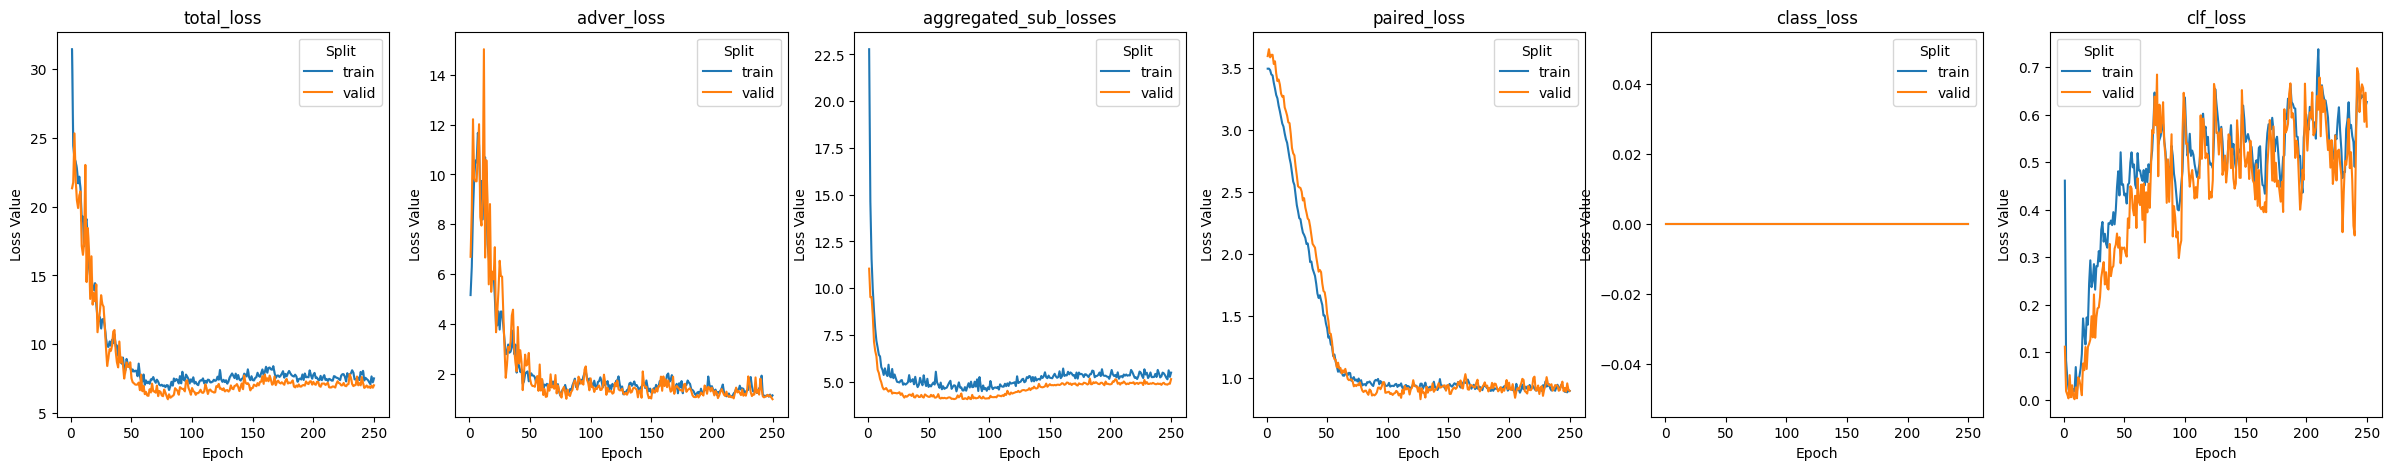

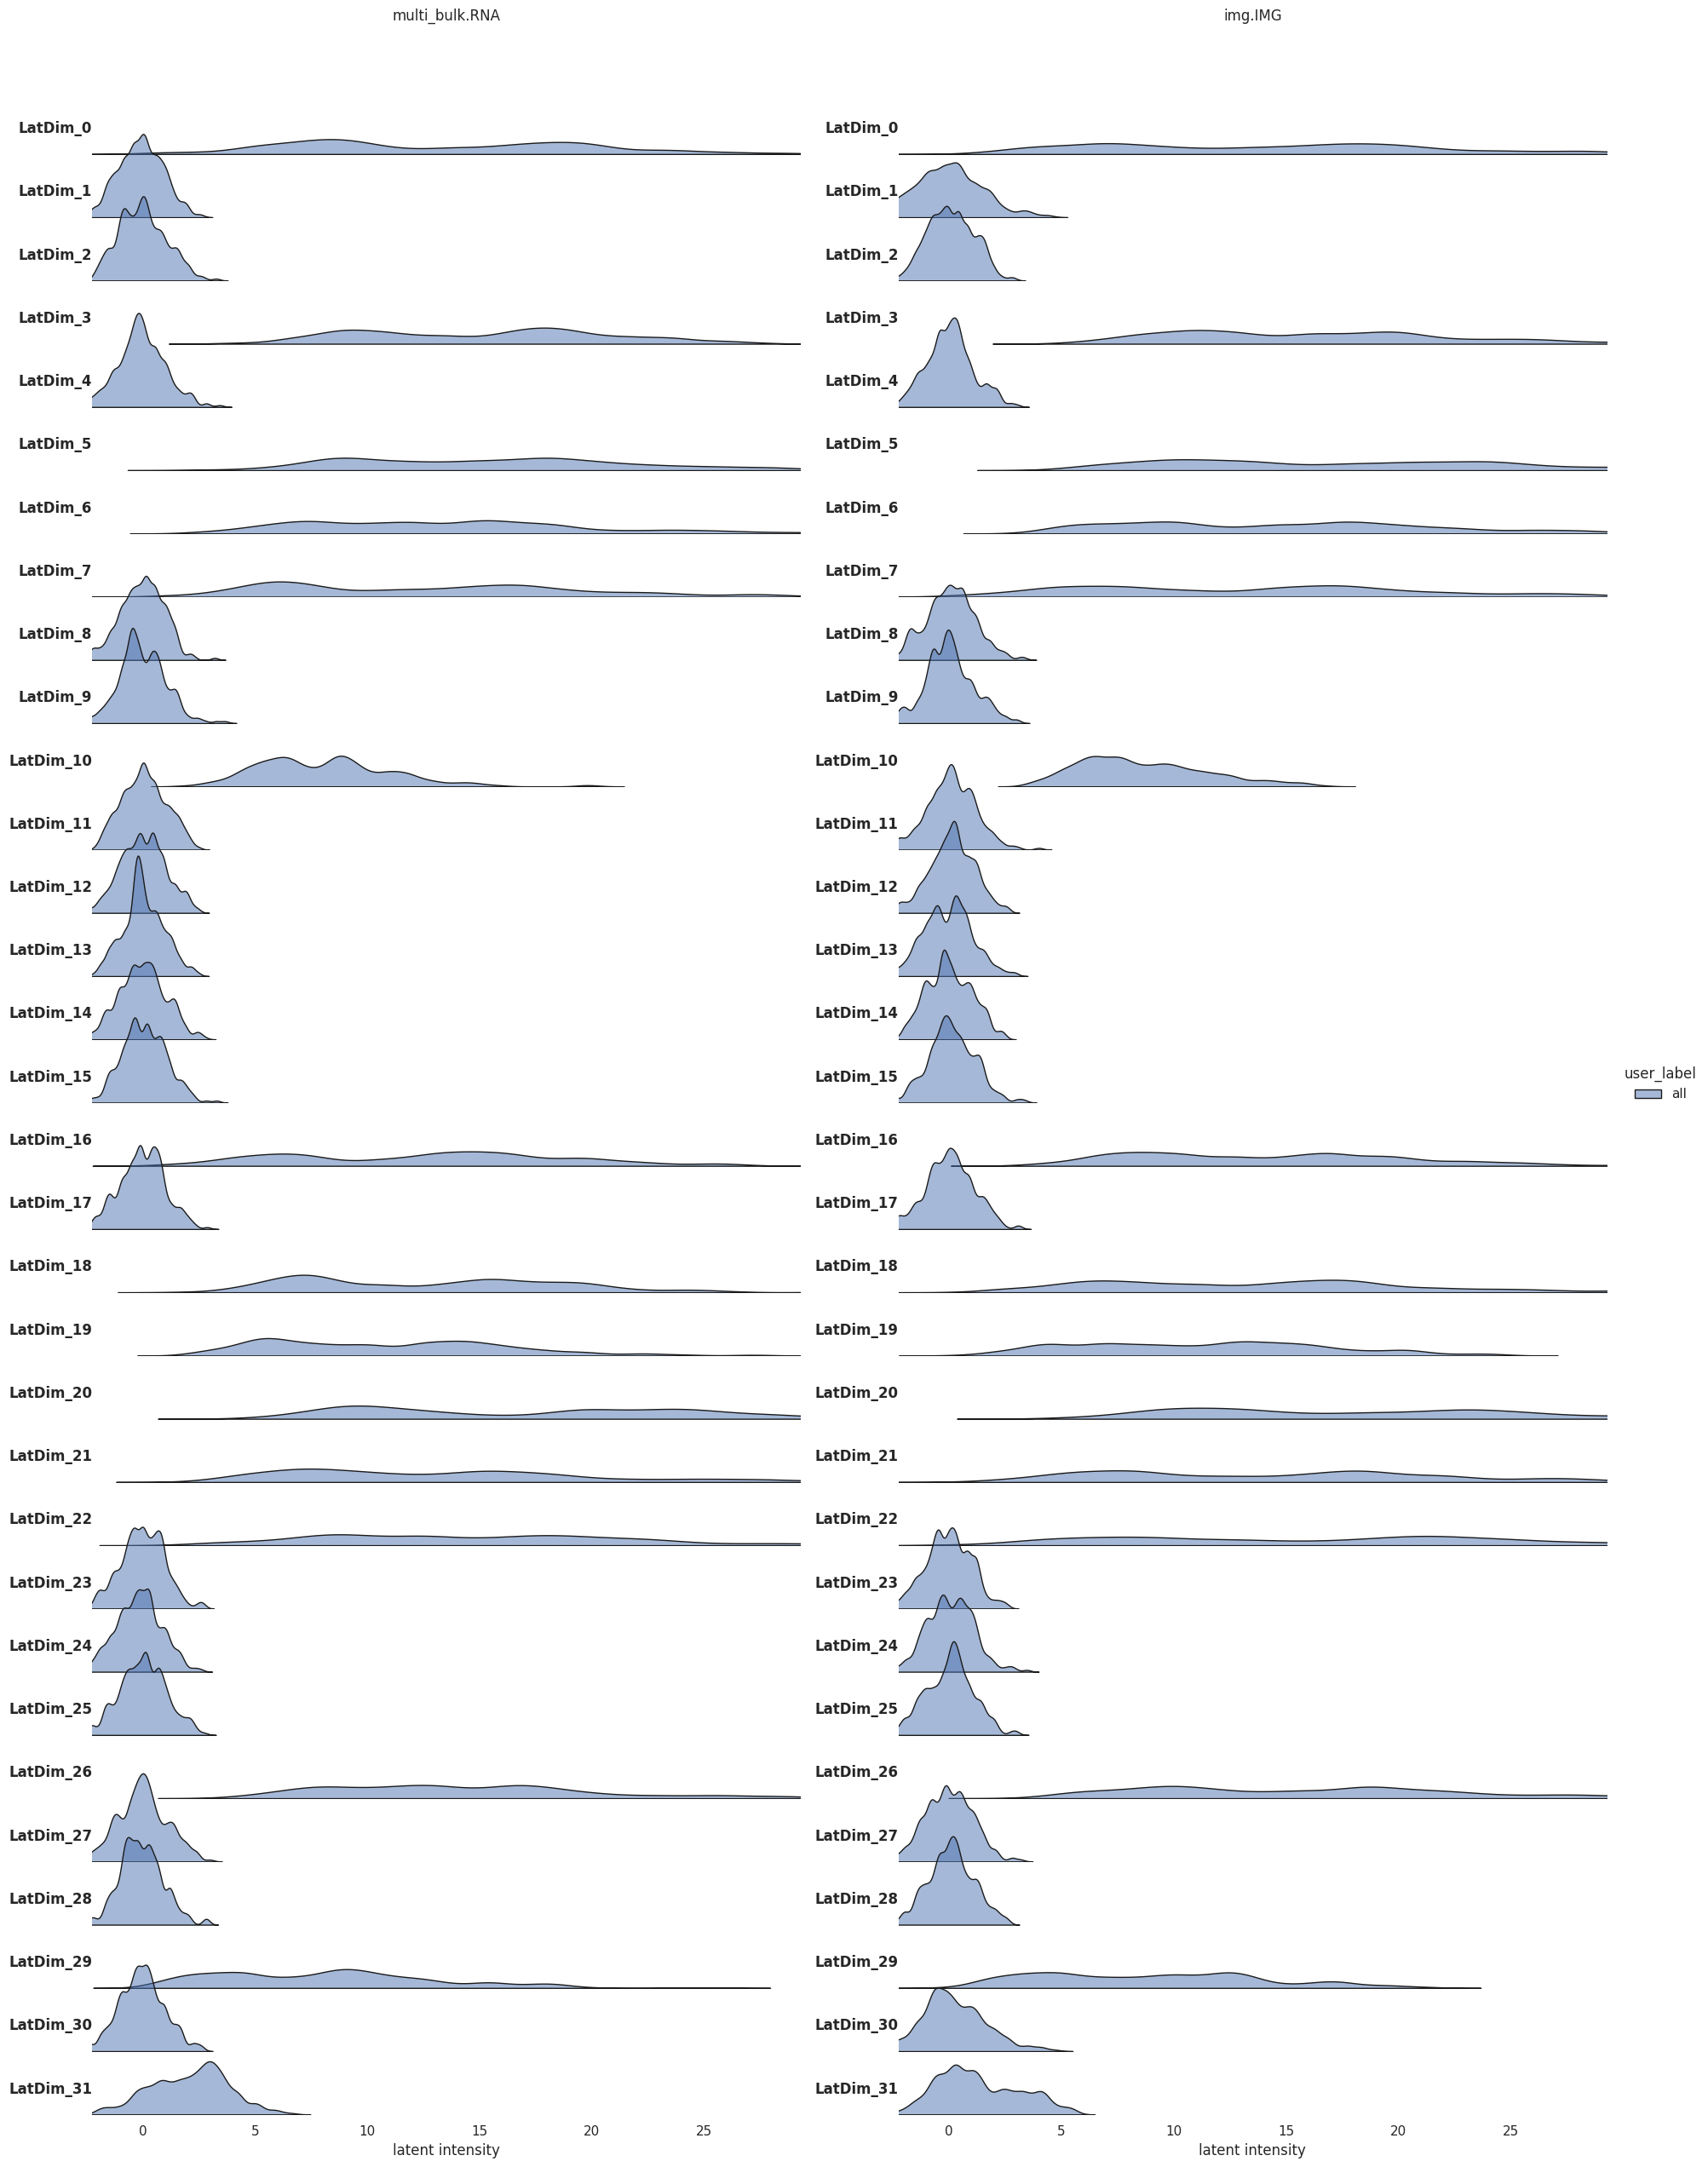

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


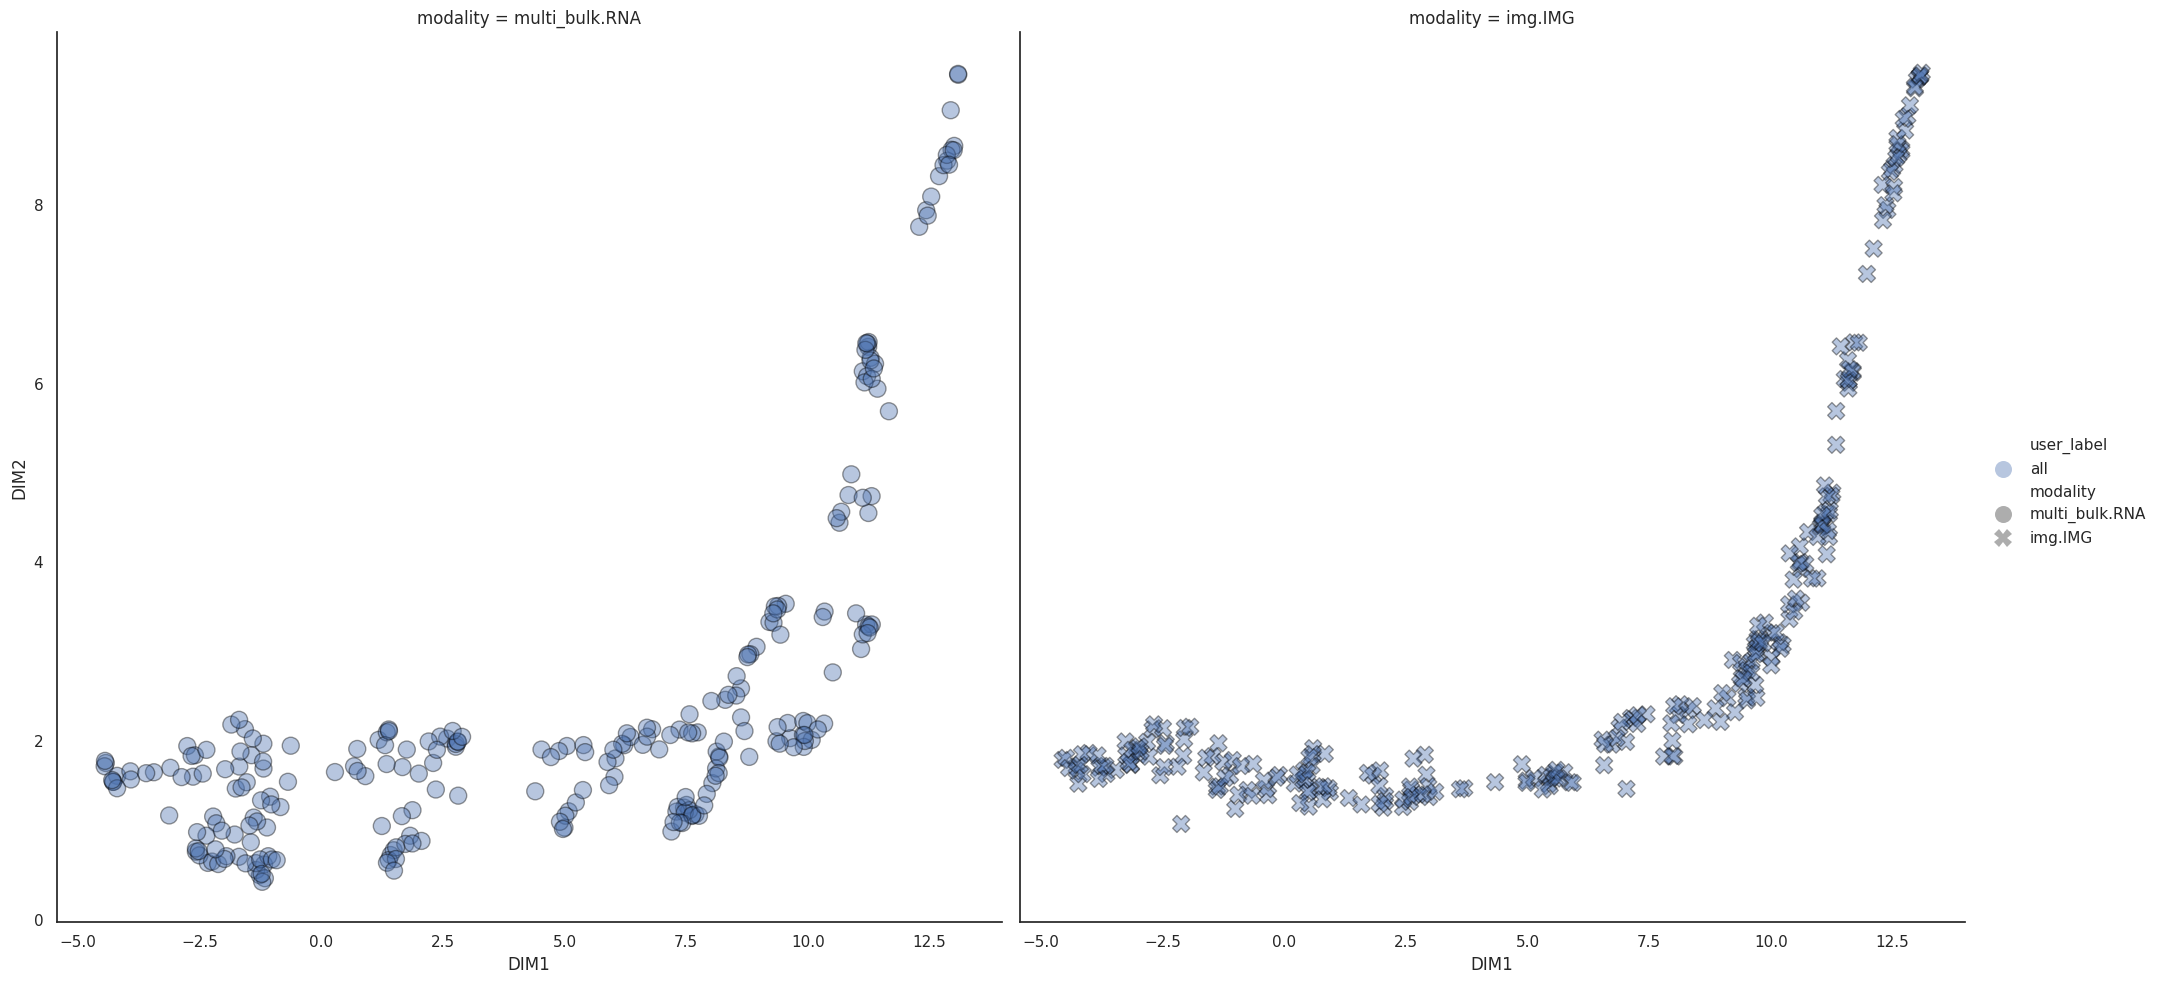

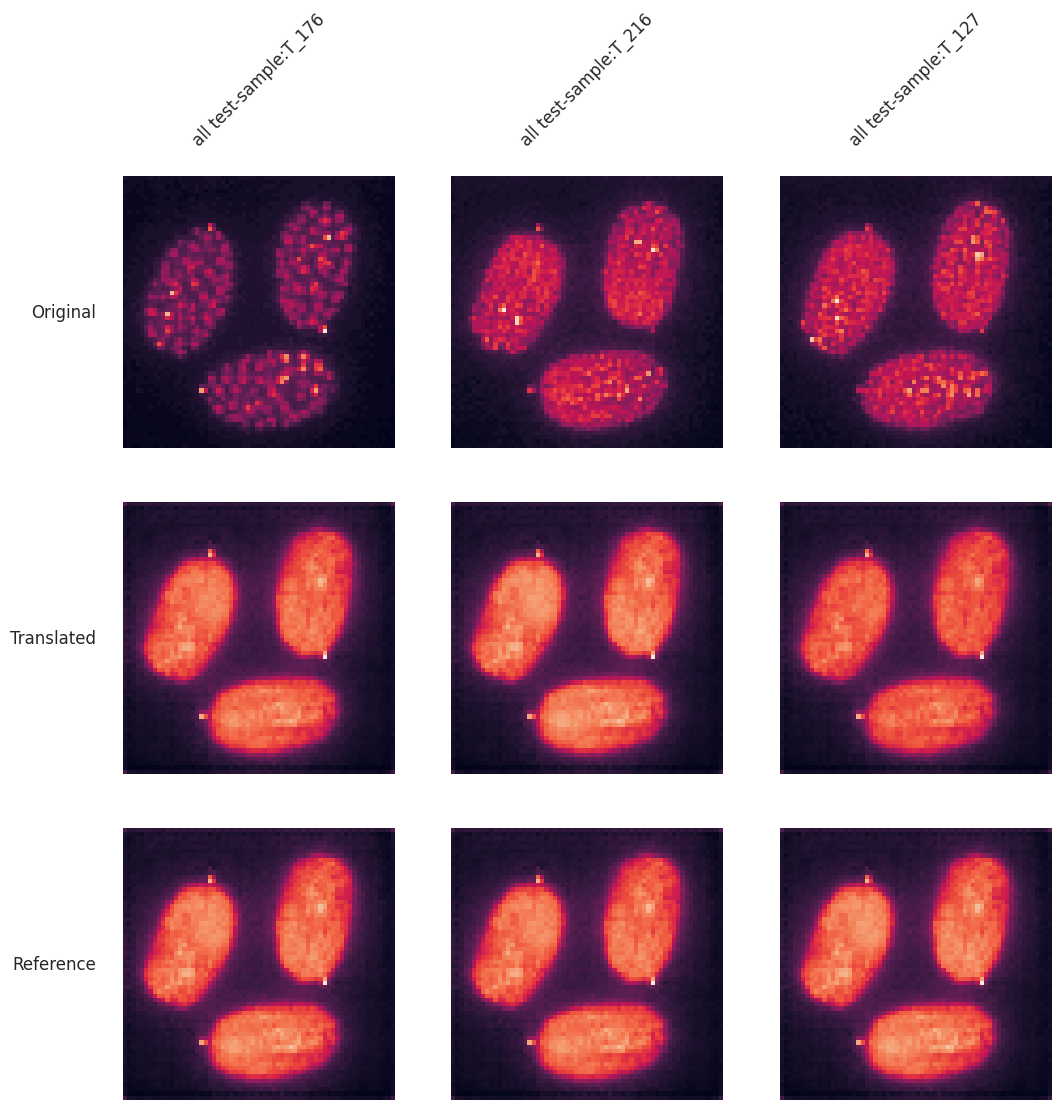

In [4]:
xmodalix.show_result()

In [5]:
to_key ="img.IMG"
print("Original test dataset size:",)
print(len(xmodalix.result.datasets.test.datasets[to_key]))

Original test dataset size:
52


In [6]:
print("Reconstructed test dataset size:",)
print(len(xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"]))

Reconstructed test dataset size:
52


In [7]:
import numpy as np
print("Total sample ids")
print(len(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key]))
print("Unique sample ids")
print(len(np.unique(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key])))

Total sample ids
52
Unique sample ids
52


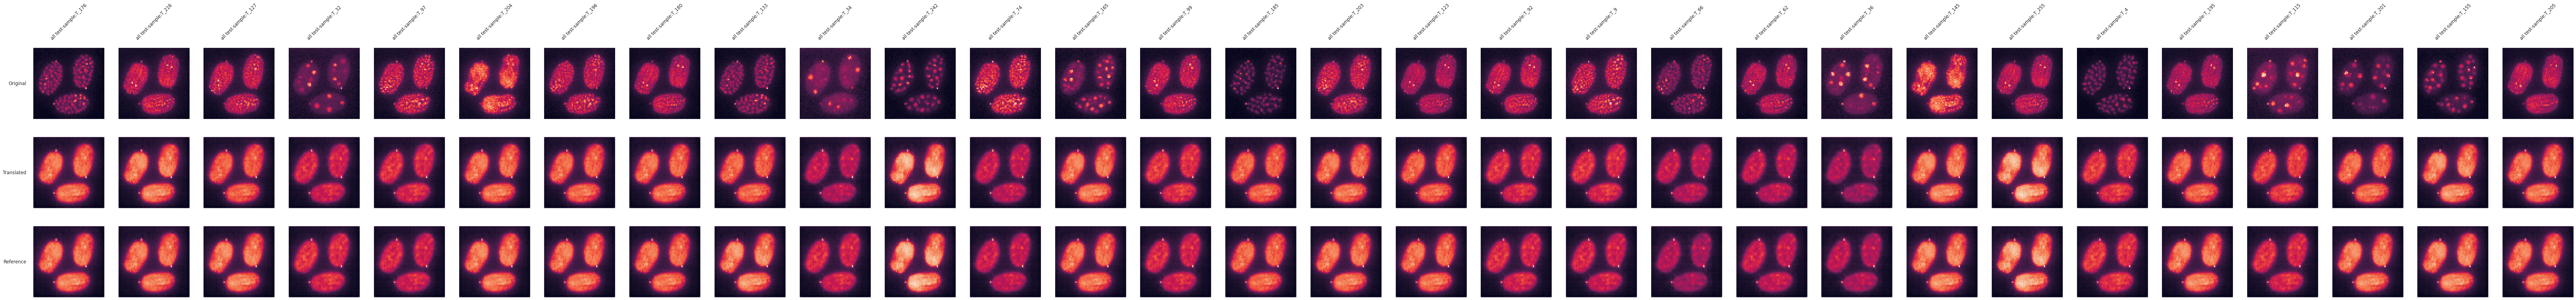

In [8]:
from autoencodix.utils._utils import find_translation_keys

dm_keys = find_translation_keys(config=xmodalix.config, trained_modalities=xmodalix._trainer._modality_dynamics.keys())

xmodalix._visualizer.show_image_translation(result=xmodalix.result, from_key=dm_keys["from"], to_key=dm_keys["to"], n_sample_per_class=30)

## ML embedding eval development

In [9]:
## Evaluate
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovr'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

xmodalix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= ["early", "extra_class_labels"],	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovr'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?
)


Perform ML task with feature df: PCA_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_multi_bulk.RNA
Perform ML task with feature df: PCA_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_img.IMG
Perform ML task with feature df: UMAP_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_multi_bulk.RNA


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Perform ML task with feature df: UMAP_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_img.IMG


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Perform ML task with feature df: RandomFeature_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_multi_bulk.RNA_R1
RandomFeature_$_multi_bulk.RNA_R2
RandomFeature_$_multi_bulk.RNA_R3
RandomFeature_$_multi_bulk.RNA_R4
RandomFeature_$_multi_bulk.RNA_R5
Perform ML task with feature df: RandomFeature_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_img.IMG_R1
RandomFeature_$_img.IMG_R2
RandomFeature_$_img.IMG_R3
RandomFeature_$_img.IMG_R4
RandomFeature_$_img.IMG_R5
Perform ML task with feature df: Latent_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing da

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [10]:
xmodalix.result.embedding_evaluation

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,MODALITY,ML_TASK,ML_SUBTASK
0,train,early,roc_auc_ovr,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,early,roc_auc_ovr,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
2,test,early,roc_auc_ovr,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
0,train,extra_class_labels,r2,0.999561,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,extra_class_labels,r2,0.999502,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
...,...,...,...,...,...,...,...,...,...
1,valid,early,roc_auc_ovr,0.797101,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
2,test,early,roc_auc_ovr,0.822917,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
0,train,extra_class_labels,r2,0.776167,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG
1,valid,extra_class_labels,r2,0.581127,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG


Showing plot for ML algorithm: LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='sag')


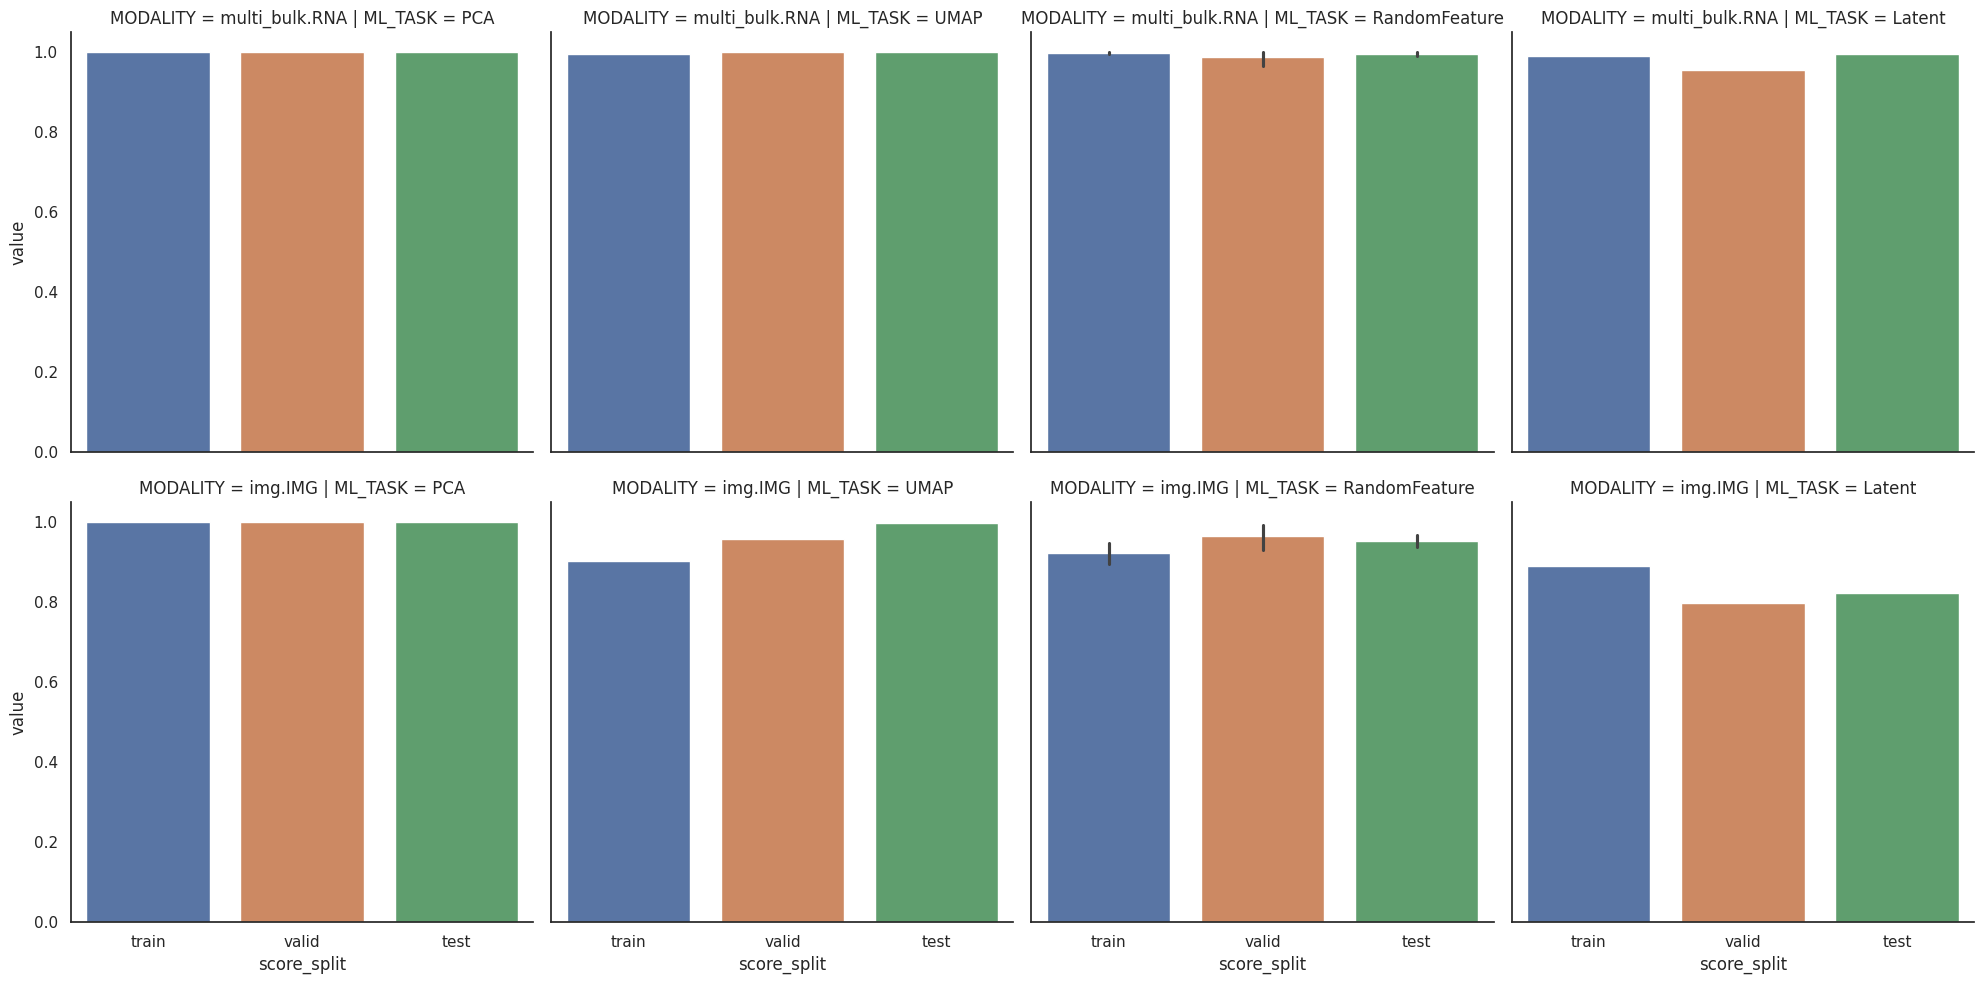

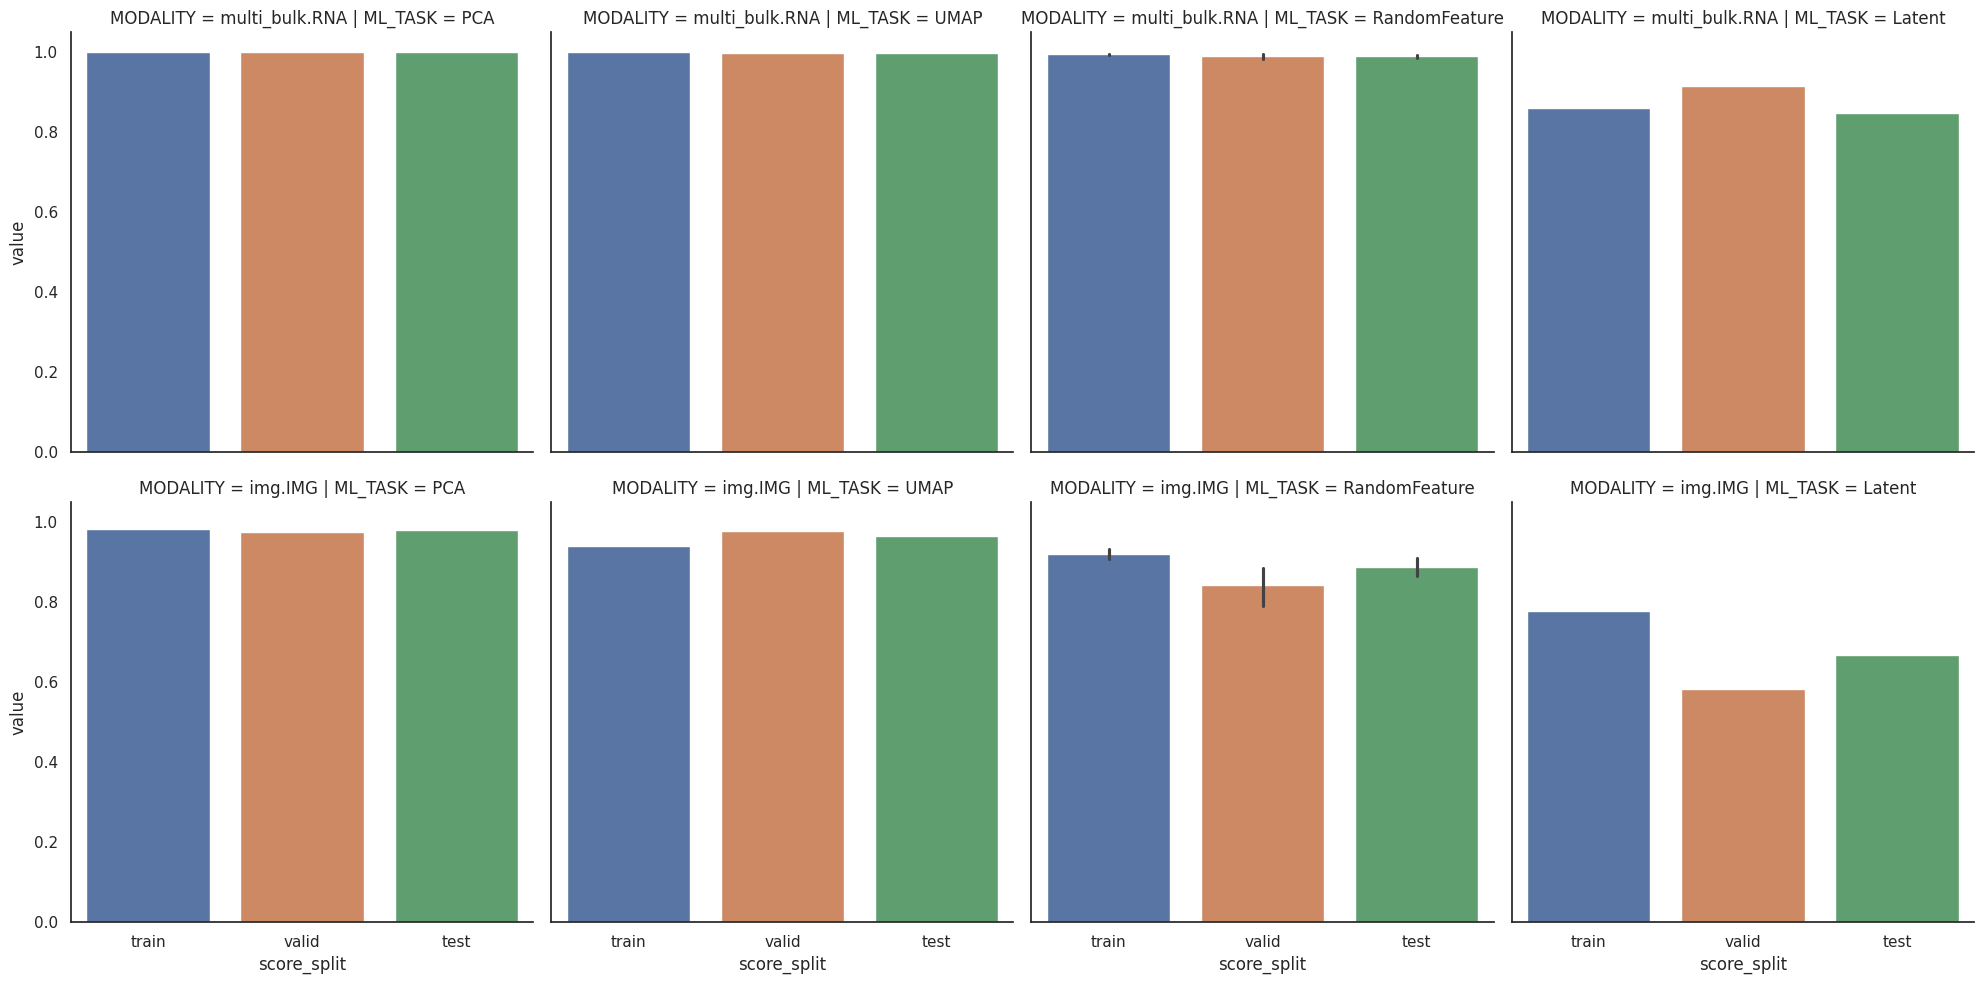

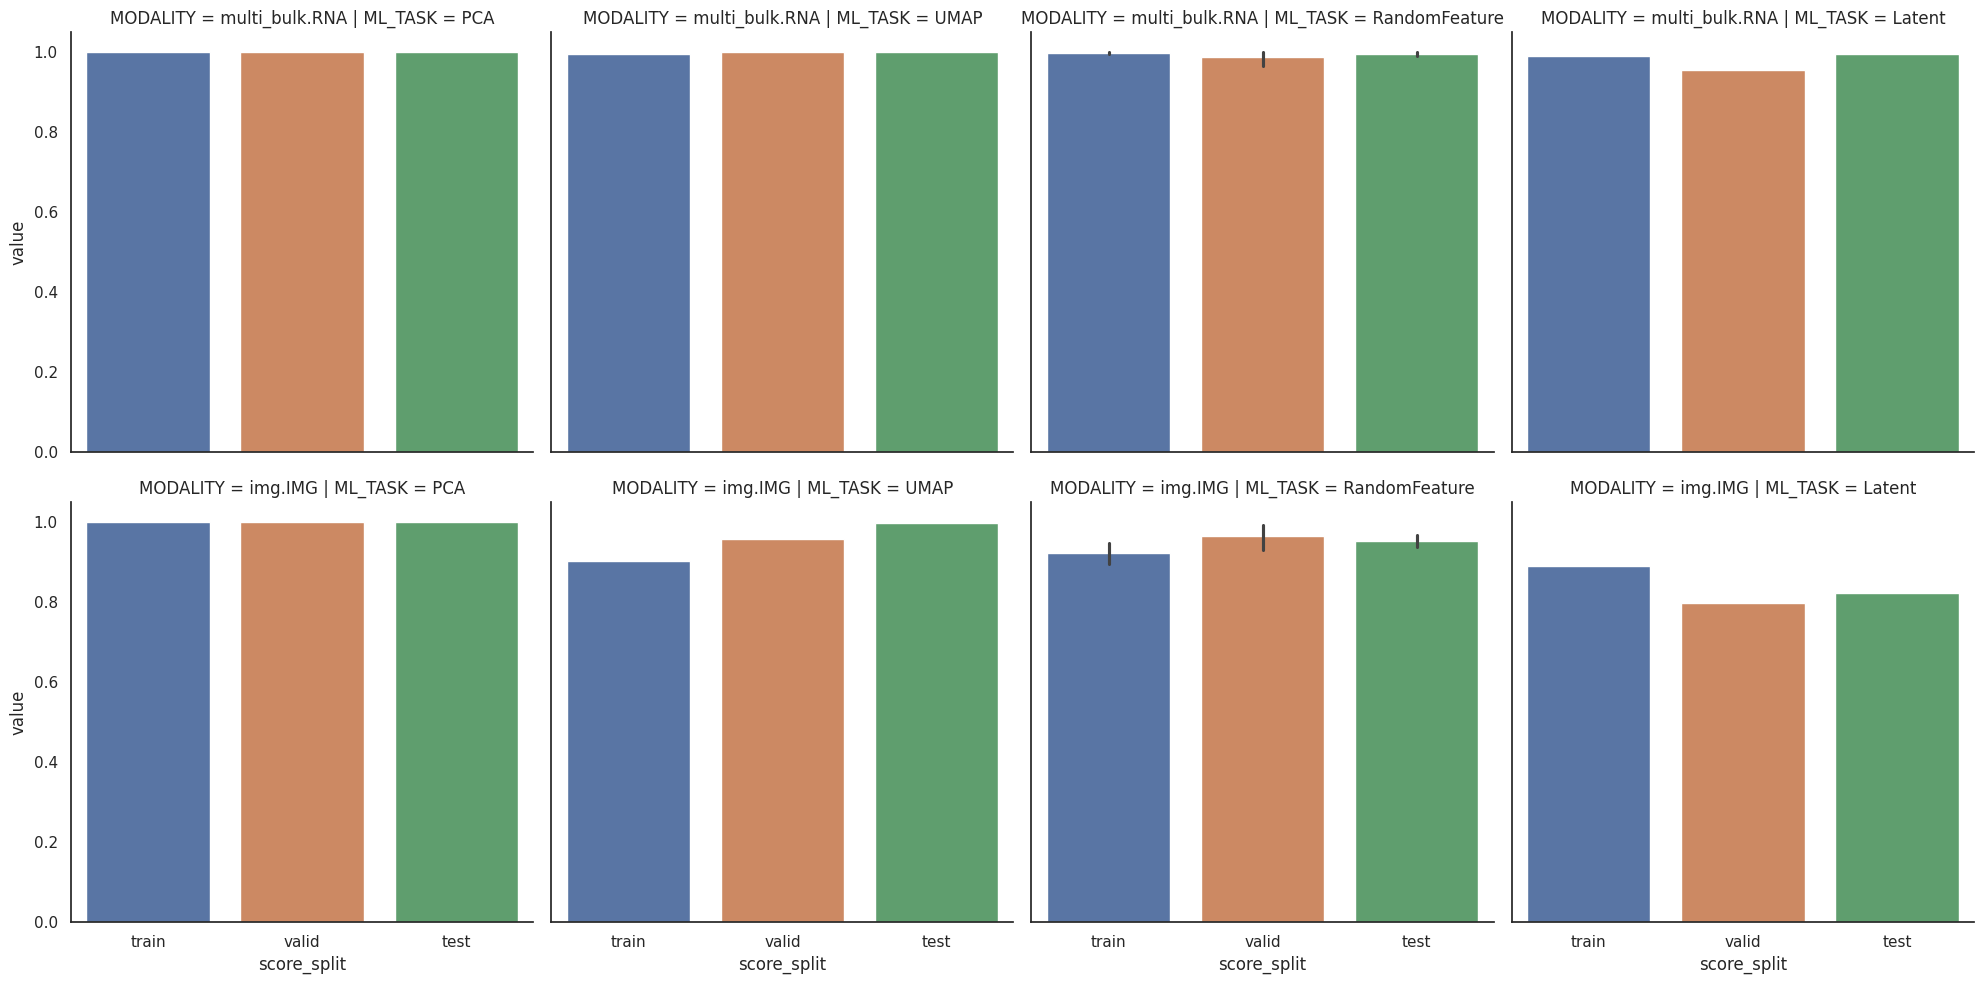

In [11]:
fig = xmodalix._visualizer.show_evaluation(
	param="early",
	metric="roc_auc_ovr"
)

## UMAP/PCA translation visualization

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


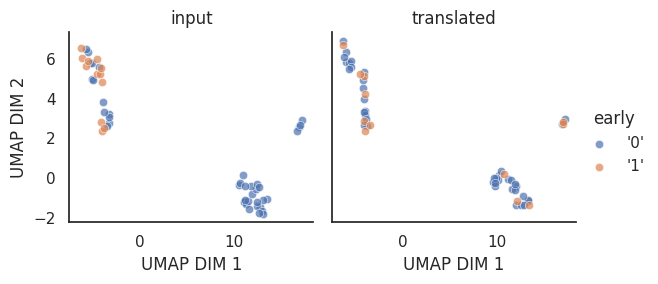

In [12]:
fig = xmodalix._visualizer.show_2D_translation(
	result=xmodalix.result,
	translated_modality="img.IMG",
	split="test",
	param="early",
	# param="extra_class_labels",
	reducer="UMAP",
)

## Recon error and VAE pure comparison

In [13]:
## Imagix (pure comparison)
from autoencodix.configs.default_config import DataCase

img_config2 = img_config # Copy from x-modalix

img_config2.data_case = DataCase.IMG_TO_IMG

img_config2.data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
				scaling="MINMAX",
                data_type="IMG",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    )
img_config2.beta = 0.01

In [14]:
imagix = acx.Imagix(config=img_config2)
imagix.run()

preprocessing
--------------
img to img CASE =============
Checking data type: IMG
Found image type in config
current data info: file_path='../data/images/ALY-2_SYS721/' data_type='IMG' scaling='MINMAX' filtering='VAR' sep=None extra_anno_file=None is_single_cell=False min_cells=0.05 min_genes=0.02 selected_layers=['X'] is_X=False normalize_counts=True log_transform=True k_filter=20 img_root=None img_width_resize=64 img_height_resize=64 translate_direction=None pretrain_epochs=0
Checking data type: ANNO
Given image size is possible, rescaling images to: 64x64
reading annotation file: ../data/ALY-2_SYS721_mappings.txt
Successfully loaded 260 images for IMG
calling normalize image in _process_ing_to_img_case
--- Running Pairing-Aware Split ---
Identified 260 fully paired samples across all modalities.
Identified 0 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Converting 182 images to torch.float32 tensors...
Conv

/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_imgreader.py:251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  annotation = pd.read_csv(anno_file, sep=sep)


Epoch 1 - Train Loss: 90591.5684
Sub-losses: recon_loss: 88050.3291, var_loss: 2541.2404, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 27339.7754
Sub-losses: recon_loss: 25698.0391, var_loss: 1641.7365, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 57789.3779
Sub-losses: recon_loss: 53238.9668, var_loss: 4550.4103, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 15729.4150
Sub-losses: recon_loss: 13542.7578, var_loss: 2186.6575, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 38640.8364
Sub-losses: recon_loss: 34719.2927, var_loss: 3921.5434, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Valid Loss: 4080.2434
Sub-losses: recon_loss: 4073.1042, var_loss: 7.1391, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 4 - Train Loss: 19316.6736
Sub-losses: recon_loss: 19169.1891, var_loss: 147.4846, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: ImageVAEArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._image_dataset.ImageDataset object at 0x78b8d81c58a0>, valid=<autoencodix.data._image_dataset.ImageDataset object at 0x78b8d81c7d30>, test=<autoencodix.data._image_dataset.ImageDataset object at 0x78b8d81c7f40>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 52 × 32
    uns: 'var_names'
final_reconstruction: <au

Creating plots ...


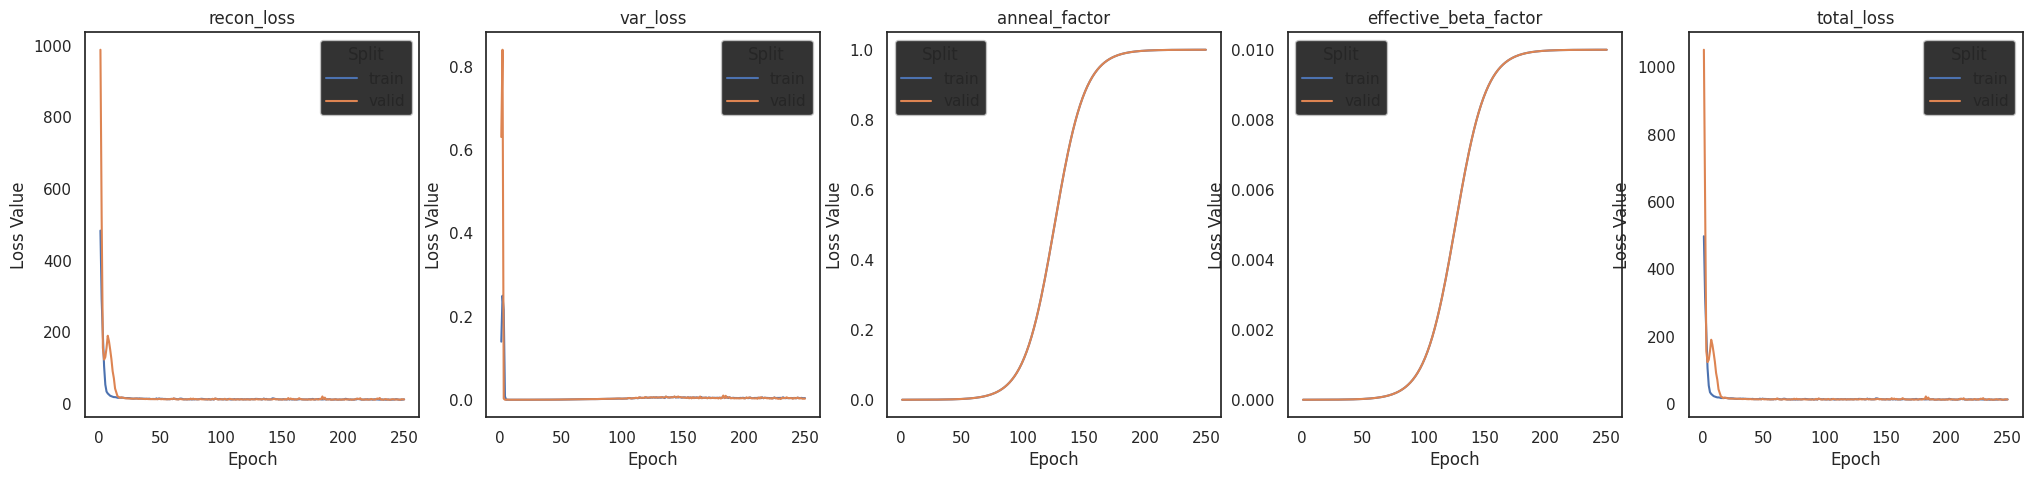

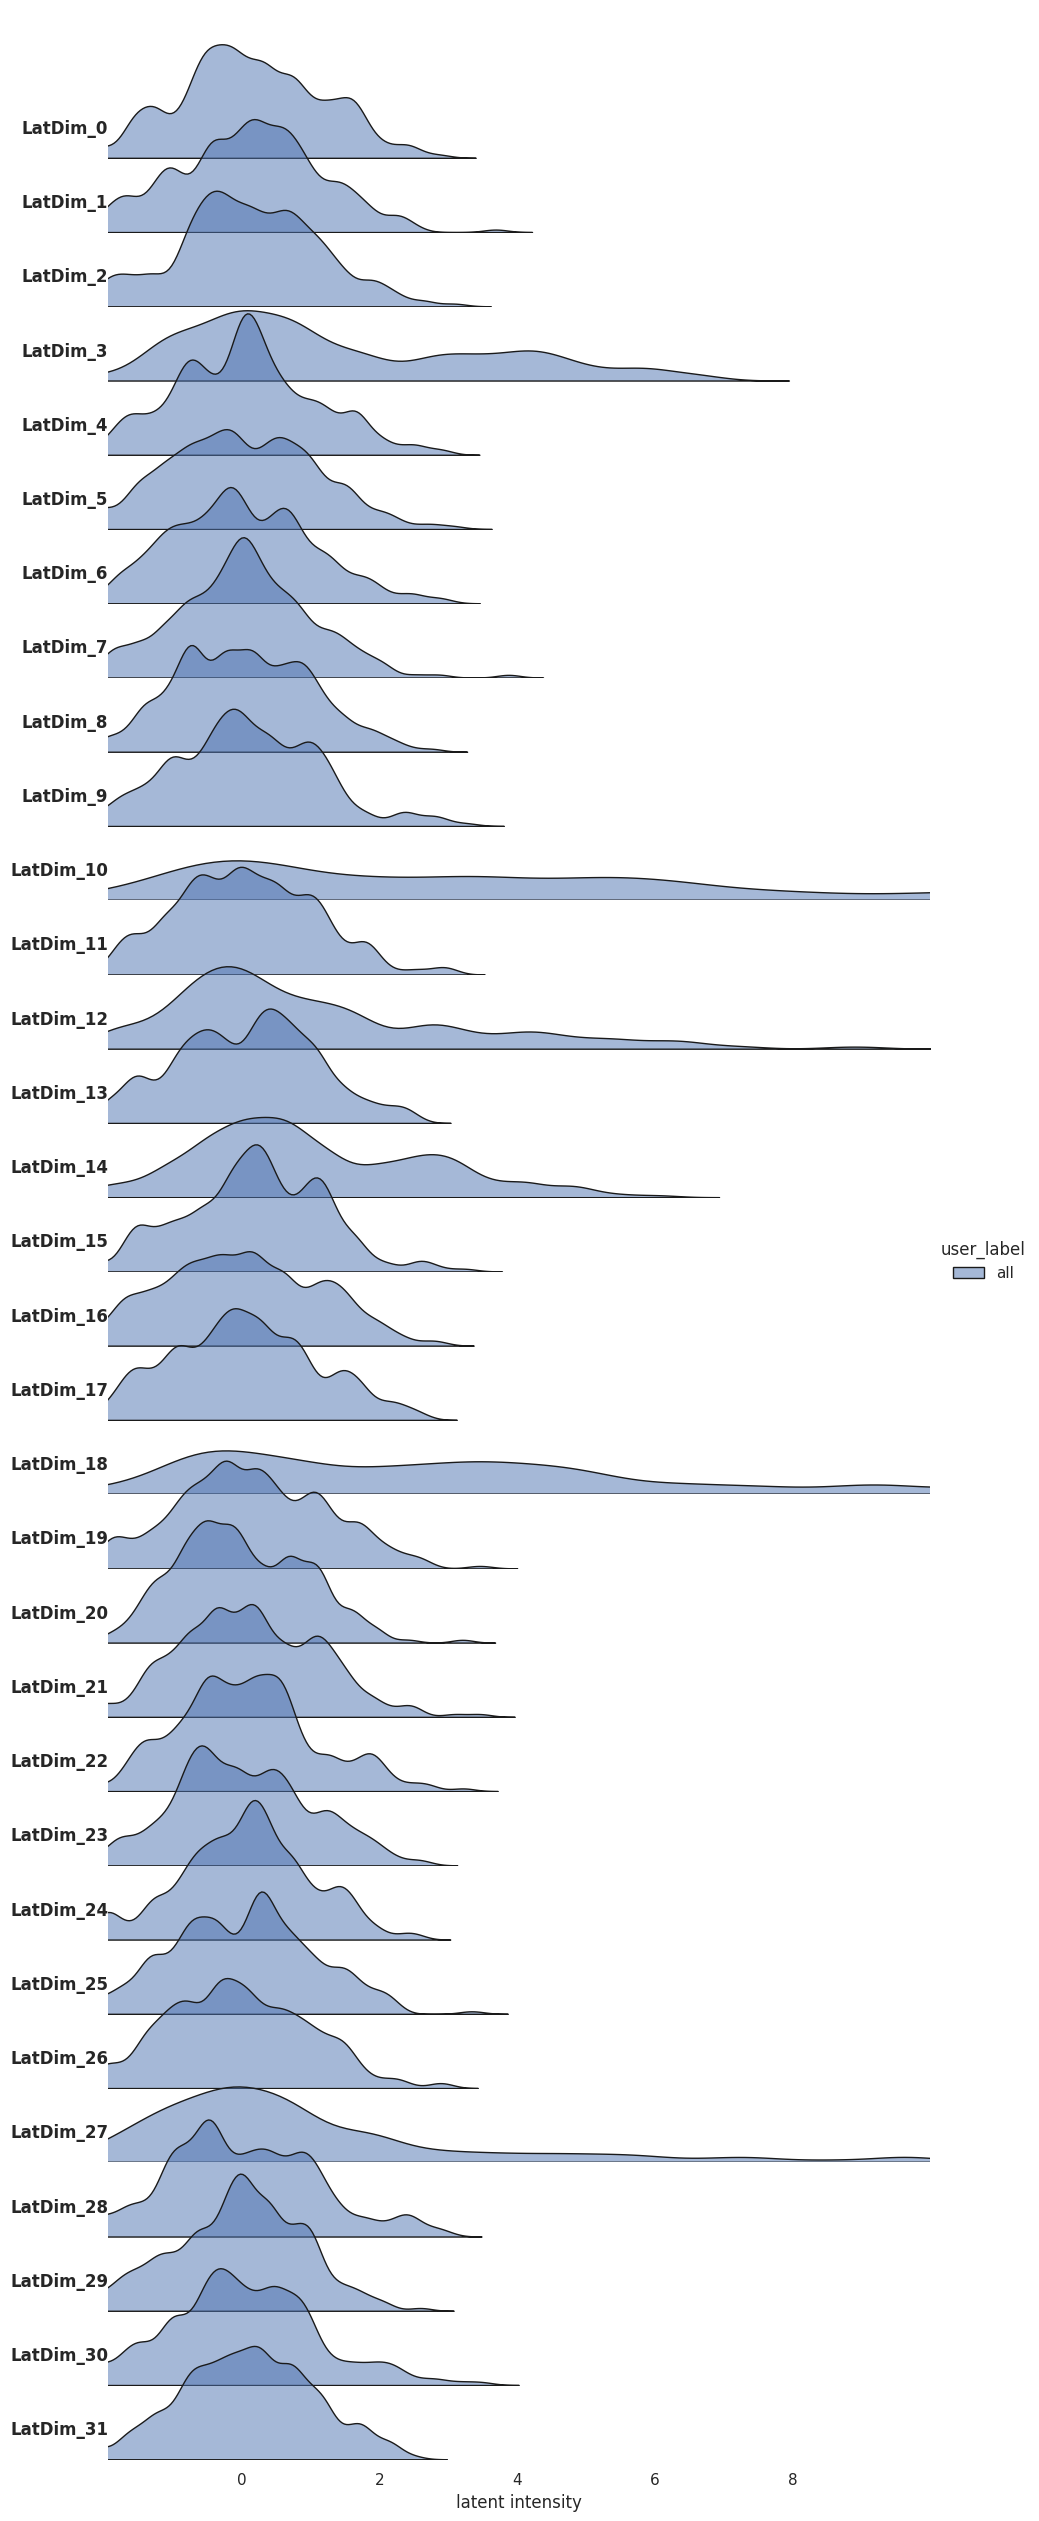

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


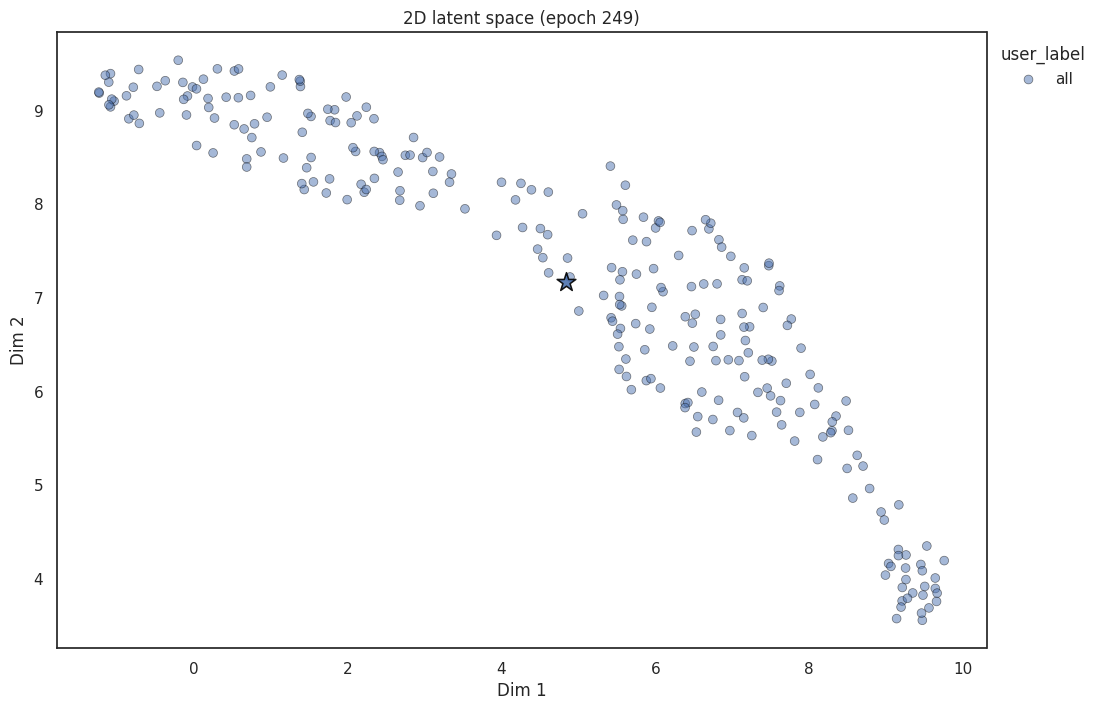

In [15]:
imagix.show_result()

In [16]:
# n_samples = 3
imagix.result.datasets.test.sample_ids

['T_155',
 'T_139',
 'T_225',
 'T_133',
 'T_203',
 'T_204',
 'T_99',
 'T_253',
 'T_74',
 'T_145',
 'T_191',
 'T_201',
 'T_32',
 'T_242',
 'T_72',
 'T_36',
 'T_255',
 'T_196',
 'T_21',
 'T_176',
 'T_40',
 'T_213',
 'T_13',
 'T_151',
 'T_92',
 'T_115',
 'T_165',
 'T_25',
 'T_134',
 'T_30',
 'T_4',
 'T_246',
 'T_34',
 'T_66',
 'T_185',
 'T_91',
 'T_195',
 'T_123',
 'T_11',
 'T_17',
 'T_75',
 'T_216',
 'T_86',
 'T_97',
 'T_9',
 'T_102',
 'T_205',
 'T_127',
 'T_116',
 'T_62',
 'T_180',
 'T_218']

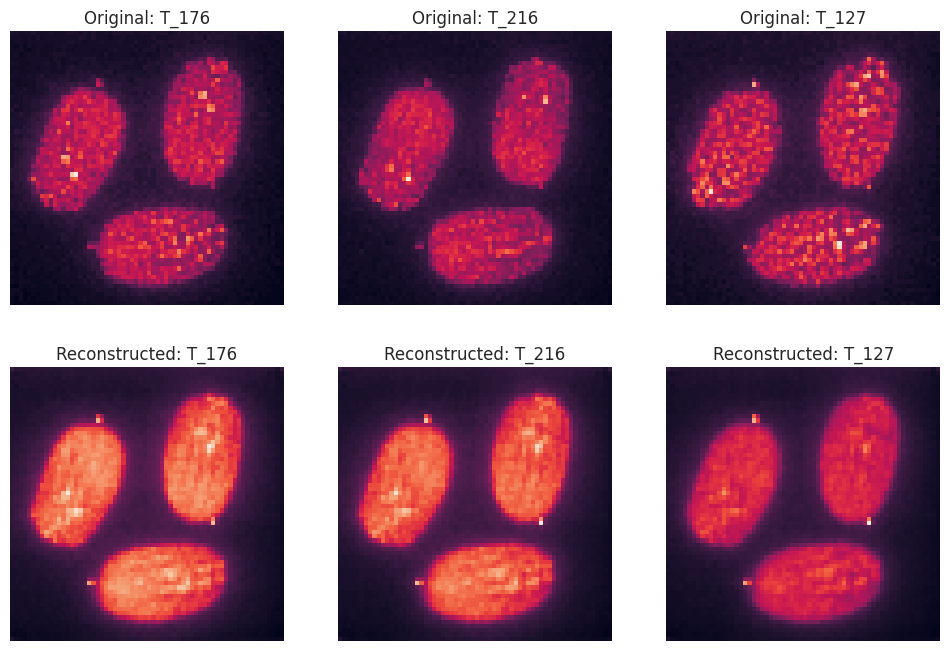

In [17]:
imagix._visualizer.show_image_recon_grid(result=imagix.result)

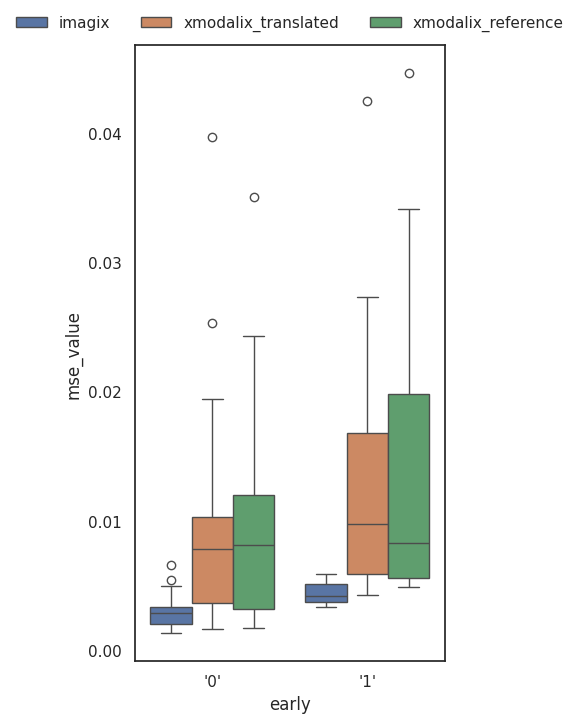

In [18]:
param = "early"
fig, df_comparison = xmodalix._evaluator.pure_vae_comparison(
	xmodalix_result = xmodalix.result,
	pure_vae_result = imagix.result,
	to_key = "img.IMG",
	param = param
)

xmodalix._visualizer.plots["PureVAEComparison"][param] = fig
fig.figure